In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'


engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

engine.dispose()

weather_df.head(10)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [66]:
#Build a regression model where the target variable is temperature. As explanatory variables, use humidity, windspeed, windbearing, and pressure. Estimate the model using OLS.

In [67]:
weather=pd.DataFrame(weather_df[['temperature','humidity','windspeed','windbearing','pressure']])
weather.head(10)

,temperature,humidity,windspeed,windbearing,pressure
0,9.472222,0.89,14.1197,251.0,1015.13
1,9.355556,0.86,14.2646,259.0,1015.63
2,9.377778,0.89,3.9284,204.0,1015.94
3,8.288889,0.83,14.1036,269.0,1016.41
4,8.755556,0.83,11.0446,259.0,1016.51
5,9.222222,0.85,13.9587,258.0,1016.66
6,7.733333,0.95,12.3648,259.0,1016.72
7,8.772222,0.89,14.1519,260.0,1016.84
8,10.822222,0.82,11.3183,259.0,1017.37
9,13.772222,0.72,12.5258,279.0,1017.22


In [68]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 5 columns):
temperature    96453 non-null float64
humidity       96453 non-null float64
windspeed      96453 non-null float64
windbearing    96453 non-null float64
pressure       96453 non-null float64
dtypes: float64(5)
memory usage: 3.7 MB


In [69]:
weather.describe()

,temperature,humidity,windspeed,windbearing,pressure
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,0.734899,10.810640,187.509232,1003.235956
std,9.551546,0.195473,6.913571,107.383428,116.969906
min,-21.822222,0.000000,0.000000,0.000000,0.000000
25%,4.688889,0.600000,5.828200,116.000000,1011.900000
50%,12.000000,0.780000,9.965900,180.000000,1016.450000
75%,18.838889,0.890000,14.135800,290.000000,1021.090000
max,39.905556,1.000000,63.852600,359.000000,1046.380000


In [70]:
weather.isnull().mean()*100

temperature    0.0
humidity       0.0
windspeed      0.0
windbearing    0.0
pressure       0.0
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1a230bd278>,
 'caps': [<matplotlib.lines.Line2D at 0x1a23327c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a233274a8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a244d6320>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a244d6668>],
 'means': []}

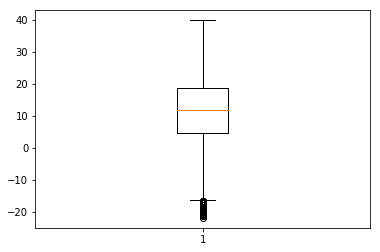

In [71]:
plt.boxplot(weather['temperature'])

In [72]:
#temperature column seems to be ok, no need for data cleaning.  

In [73]:
weather.sort_values(by='temperature', ascending=True)

,temperature,humidity,windspeed,windbearing,pressure
54847,-21.822222,0.80,3.0751,323.0,1033.66
55494,-21.111111,0.71,3.2200,190.0,1032.60
55490,-21.111111,0.74,3.2200,200.0,1034.30
55493,-21.111111,0.78,4.8300,180.0,1033.30
55495,-20.783333,0.80,4.4275,181.0,1032.33
55491,-20.555556,0.78,3.2200,200.0,1033.80
54866,-20.555556,0.78,6.4400,30.0,1032.10
55492,-20.277778,0.79,5.6672,158.0,1033.53
55489,-20.050000,0.78,6.2146,170.0,1034.74
55487,-20.000000,0.78,3.2200,200.0,1035.40


{'whiskers': [<matplotlib.lines.Line2D at 0x1a23c89320>,
 'caps': [<matplotlib.lines.Line2D at 0x1a23c899b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a23c891d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a24e6d080>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a24e6d3c8>],
 'means': []}

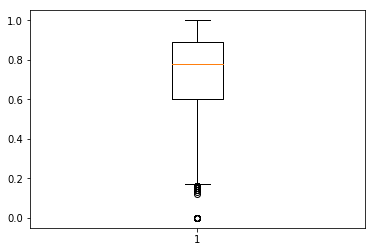

In [74]:
plt.boxplot(weather['humidity'])

In [75]:
#humidity can neither be negative or zero value.

In [76]:
weather.loc[weather['humidity']== 0]

,temperature,humidity,windspeed,windbearing,pressure
19958,-1.111111,0.0,4.4275,12.0,1043.04
28101,-15.000000,0.0,3.2200,250.0,1015.10
28103,-15.555556,0.0,6.4400,160.0,1015.90
28110,-13.888889,0.0,22.5400,160.0,1016.80
29627,1.111111,0.0,20.9300,350.0,1000.10
54840,-15.555556,0.0,3.2200,220.0,1030.80
54858,-15.000000,0.0,0.0000,0.0,1034.40
54870,-16.111111,0.0,11.2700,20.0,1029.90
54872,-15.000000,0.0,14.4900,30.0,1029.80
54873,-13.888889,0.0,11.2700,40.0,1029.90


In [77]:
#when the temperature is in minus, humidity tends to be around 0.7-0.9.  As the temperature goes up,
#humidity decreases.
#I will replace humidity with zero values with the mean value of 0.78

In [80]:
weather[weather['humidity']==0] = 0.78

In [82]:
weather.loc[weather['windspeed']== 0]

,temperature,humidity,windspeed,windbearing,pressure
381,13.961111,0.82,0.0,0.0,1016.01
390,7.688889,1.00,0.0,0.0,1018.13
1014,18.866667,0.97,0.0,0.0,1016.34
1541,1.011111,1.00,0.0,0.0,1028.63
1638,-2.244444,1.00,0.0,0.0,1032.14
1640,-2.244444,1.00,0.0,0.0,1032.61
1826,-2.233333,0.99,0.0,0.0,1041.49
1853,1.427778,0.94,0.0,0.0,1039.01
1856,1.716667,0.94,0.0,0.0,1038.66
1914,-2.511111,0.85,0.0,0.0,1039.32


In [83]:
weather.loc[(weather['windspeed']== 0) & (weather['windbearing']==0)]

,temperature,humidity,windspeed,windbearing,pressure
381,13.961111,0.82,0.0,0.0,1016.01
390,7.688889,1.00,0.0,0.0,1018.13
1014,18.866667,0.97,0.0,0.0,1016.34
1541,1.011111,1.00,0.0,0.0,1028.63
1638,-2.244444,1.00,0.0,0.0,1032.14
1640,-2.244444,1.00,0.0,0.0,1032.61
1826,-2.233333,0.99,0.0,0.0,1041.49
1853,1.427778,0.94,0.0,0.0,1039.01
1856,1.716667,0.94,0.0,0.0,1038.66
1914,-2.511111,0.85,0.0,0.0,1039.32


In [85]:
#it appears that when windspeed is zero, windbearing value is also zero.
#it is possible windspeed to be zero and that in turn, windbearing to be zero as well.
#so I will leave those two columns as they are.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a246ac9e8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a24bd40b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a246ac898>],
 'medians': [<matplotlib.lines.Line2D at 0x1a24bd4748>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a24bd4a90>],
 'means': []}

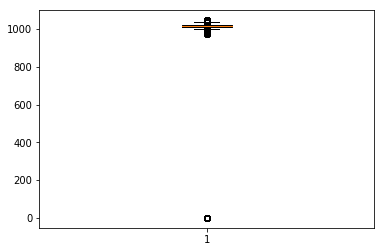

In [86]:
plt.boxplot(weather['pressure'])

In [97]:
#for pressure column, most of the data seem to be clustered around 1000.
#out of 96453 data, 1288 of them have pressure = 0.  About 1.34% of the data.
#at altitude where space begins (about 100km high), that's when the pressure becomes zero.  
#so I will replace pressure with zero values with the mean value of the column.

In [95]:
(1288/96453) * 100

1.3353654111328834

In [88]:
weather[weather['pressure']==0]

,temperature,humidity,windspeed,windbearing,pressure
858,22.477778,0.58,10.8192,159.0,0.0
874,21.061111,0.73,7.7924,264.0,0.0
924,28.838889,0.51,9.6600,177.0,0.0
945,24.950000,0.69,16.0195,180.0,0.0
1074,23.811111,0.45,16.0195,290.0,0.0
1075,21.161111,0.59,11.3827,263.0,0.0
1114,22.250000,0.59,9.8371,151.0,0.0
1117,25.050000,0.45,11.1090,207.0,0.0
1132,16.161111,0.81,3.3649,190.0,0.0
1138,22.650000,0.62,15.8907,148.0,0.0


In [91]:
weather.shape

(96453, 5)

In [98]:
weather[weather['pressure']==0] = 1016.450000

In [100]:
weather.corr()

,temperature,humidity,windspeed,windbearing,pressure
temperature,1.000000,0.996552,0.994942,0.665235,-0.010950
humidity,0.996552,1.000000,0.998222,0.665588,-0.000821
windspeed,0.994942,0.998222,1.000000,0.668934,-0.006428
windbearing,0.665235,0.665588,0.668934,1.000000,-0.009234
pressure,-0.010950,-0.000821,-0.006428,-0.009234,1.000000


In [107]:
#temperature have strong correlation with humidity, windspeed, and windbearing.
#humidity, windspeed, and windbearing have strong correlation with each other.

In [101]:
X=weather[['humidity','windspeed','windbearing','pressure']]
Y=weather['temperature']

model= linear_model.LinearRegression()
model.fit(X,Y)
y_predict=model.predict(X)

print('coeffients:', model.coef_)
print('y-intercept:', model.intercept_)

coeffients: [ 0.96114516  0.02590947  0.00252563 -0.06708195]
y-intercept: 78.68847348260857


In [103]:
# temperature = 78.6885 +  0.9611humidity + 0.0259windspeed + 0.0025windbearing - 0.0671pressure

Text(0.5, 1.0, 'temperature')

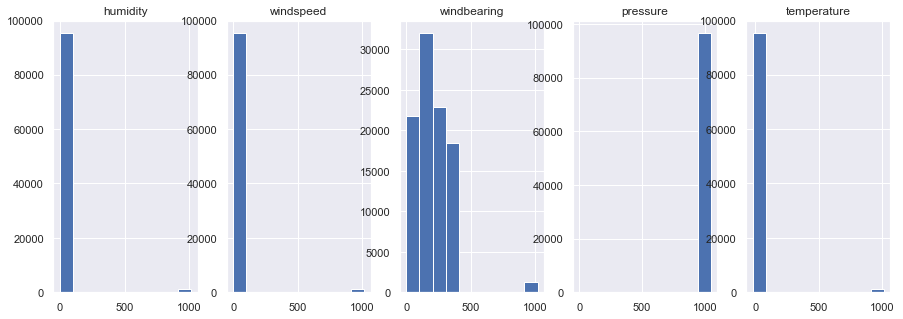

In [117]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,5,1)
plt.hist(weather['humidity'])
plt.title('humidity')

ax = fig.add_subplot(1,5,2)
plt.hist(weather['windspeed'])
plt.title('windspeed')

ax = fig.add_subplot(1,5,3)
plt.hist(weather['windbearing'])
plt.title('windbearing')

ax = fig.add_subplot(1,5,4)
plt.hist(weather['pressure'])
plt.title('pressure')

ax = fig.add_subplot(1,5,5)
plt.hist(weather['temperature'])
plt.title('temperature')

In [118]:
#humidity, windspeed, windbearing, and temperature: their distribution is all clustered on the left side of the graph.
#pressure is clustered on the opposite side.

In [123]:
#check the first assumption:
#linearity of models in their coefficients: does the target variable have a linear relationship with 
#each explanatory variable's coeffient? 
#in other words, if I were to plot the target variable vs. each coeffient, do I get a straight line?
#the model that I have used already takes this assumption into account.  So I can say that the first assumption
#is met. 

In [124]:
#assumption two: the error term should be zero on average

In [126]:
errors = Y - y_predict
np.mean(errors)

-3.411898728575476e-15

In [128]:
#the average of error terms is pretty much zero, so the second assumption is met as well.
#we have the y-intercept as well, which will force that average to be zero.

In [134]:
#assumption three: homoscedasticity.  Error variable is constant along the x-axis, where the explanatory variables
#are changing.  

In [135]:
#use Bartlett and Levene tests:

In [136]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(y_predict, errors)
lev_stats = levene(y_predict, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 348700 and p value is 0
Levene test statistic value is 274.026 and p value is 1.66e-61


In [137]:
#null hypothesis: homoscedasticity. No difference in error variances.
#p-values for both bartlett and levene are less than 0.05.  
#reject null hypothesis.
#the third assumption is not met.

In [138]:
#There may be several causes of heteroscedasticity. Examples include outliers in the data and omitted variables
#that are important in explaining the variance of the target variable. Dealing with outliers and including relevant 
#variables help to fix the heteroscedasticity problem. Some fixes to heteroscedasticity include transforming the 
#dependent variable (see Box Cox transformation and log transformation) and adding features that target the 
#poorly-estimated areas.

In [139]:
#when I look back at the target variable's (temperature) distribution graph,
#I can see that it does not have a normal distribution.  Perhaps I can do log transformation.
#also, variable 'visibility' could be a missing variable in predicting temperature as decreased visibility could
#mean there is less direct sunlight passing through our atmosphere, which is turn affect the temperature.
#some of the explanatory variables do have extremely high/low values. I did not exclude them
#as they did seem like valid data.  

In [141]:
#assumption four: low multicollinearity
#as mentioned above, humidity, windspeed, and windbearing variables have strong correlation with each other.
#so this assumption is met.  
#our goal is to just predict the temperature, so this does not affect our goal.
#however, I don't know which variable weighs more.
#solution: PCA

In [148]:
#assumption five: error terms should be uncorrelated with one another.
#independent error terms = no autocorrelation

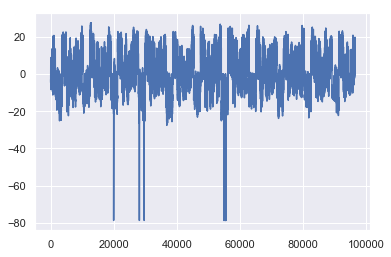

In [144]:
plt.plot(errors)

In [174]:
#look for randomness in the graph above to see if the error terms are uncorrelated.
#it does appear that randomness is present.
#assumption five is met?

In [158]:
#you can check if error terms are correlated or not by plotting the 
#error against its previous error term.  
#so in other words, does our previous error term have any effect on the current error term? 

In [166]:
errors_i_plus_1= errors[1:]
errors_original_i=errors[:-1]

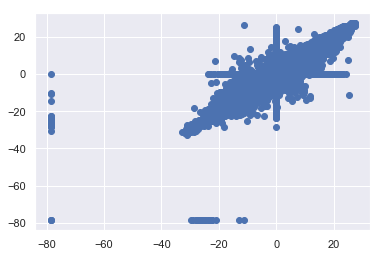

In [167]:
plt.scatter(errors_original_i, errors_i_plus_1)

In [175]:
#uh... the above graph does seem like there is a strong correlation between the error terms

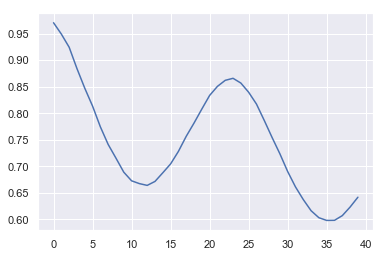

In [176]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])    #so I'm checking correlation between errors_i and errors _i+1??? so x-axis is each error term?   
plt.show()                #I want to know what the 3rd line of code is doing

In [170]:
#our autocorrelation between the error terms are high (ranging between 0.6 - 0.98)
#so our fifth assumption is not met either

In [217]:
#assumption six: features shouldn't be correlated with the errors
#exogeneity: no omitted variable bias.
#explanatory variable x, and target variable y.
#exogeneity assumes that there is no other variable (no omitted variable) that's vital to the relationship between
#x and y, affecting both x and y.

In [220]:
weather_df.corr()

,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure
temperature,1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
apparenttemperature,0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
windspeed,0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
windbearing,0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
visibility,0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
loudcover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pressure,-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


In [232]:
#visibility have weak correlation with other variables.
#apparent temperature cannot be used.
#precipitation types are affected by temperature, etc. not the other way around.  Precipitation is a result

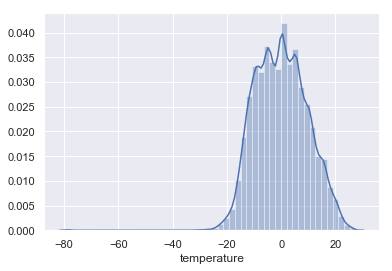

In [192]:
import seaborn as sns
sns.set()

sns.distplot(errors)

In [193]:
len(errors)

96453

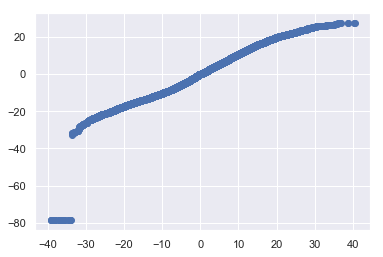

In [202]:
#QQ plot
norm=np.random.normal(np.mean(errors),np.std(errors),len(errors))
plt.scatter(np.sort(norm), np.sort(errors))

Text(0.5, 1.0, 'QQ plot')

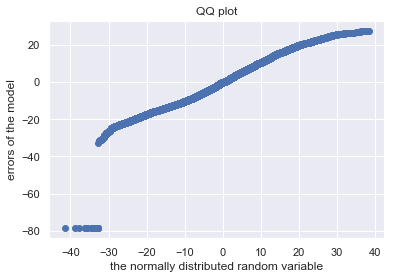

In [198]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.scatter(np.sort(rand_nums), np.sort(errors))
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

In [204]:
#error terms have normal distribution based on the above 3 graphs

In [207]:
from scipy.stats import normaltest

In [208]:
norm_stats = normaltest(errors)

norm_stats

NormaltestResult(statistic=520.6948417739256, pvalue=8.561536865140671e-114)

In [209]:
#null hypothesis: normal distribution
#p-value less than 0.05.  Null hypothesis rejected.
#our error terms are not normally distributed.

In [212]:
#in order to measure the statistical significance of our estimated coefficients, 
#error terms must be normally distributed. We'll cover t- and F-tests, which rest upon the normality of 
#the errors in the next checkpoint.
#ways to fix: include omitted relevant explanatory variable and/or transform dependent variable.

In [213]:
#so bottom line, most of these issues can be addressed by including omitted relevant explanatory variables
#and transforming dependent variable.